Cloud Top Temp min: 190.0899957511574
Cloud Top Temp max: 310.0299930702895
Cloud Top Pressure min: 112.10000167042017
Cloud Top Pressure max: 1039.2000154852867
Cloud frac min: 0.0
Cloud frac max: 1.0
Cloud Top Height min: 0.0
Cloud Top Height max: 16038.0


/home/supriya/anaconda3/envs/stratus/lib/python3.6/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/home/supriya/anaconda3/envs/stratus/lib/python3.6/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/home/supriya/anaconda3/envs/stratus/lib/python3.6/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwa

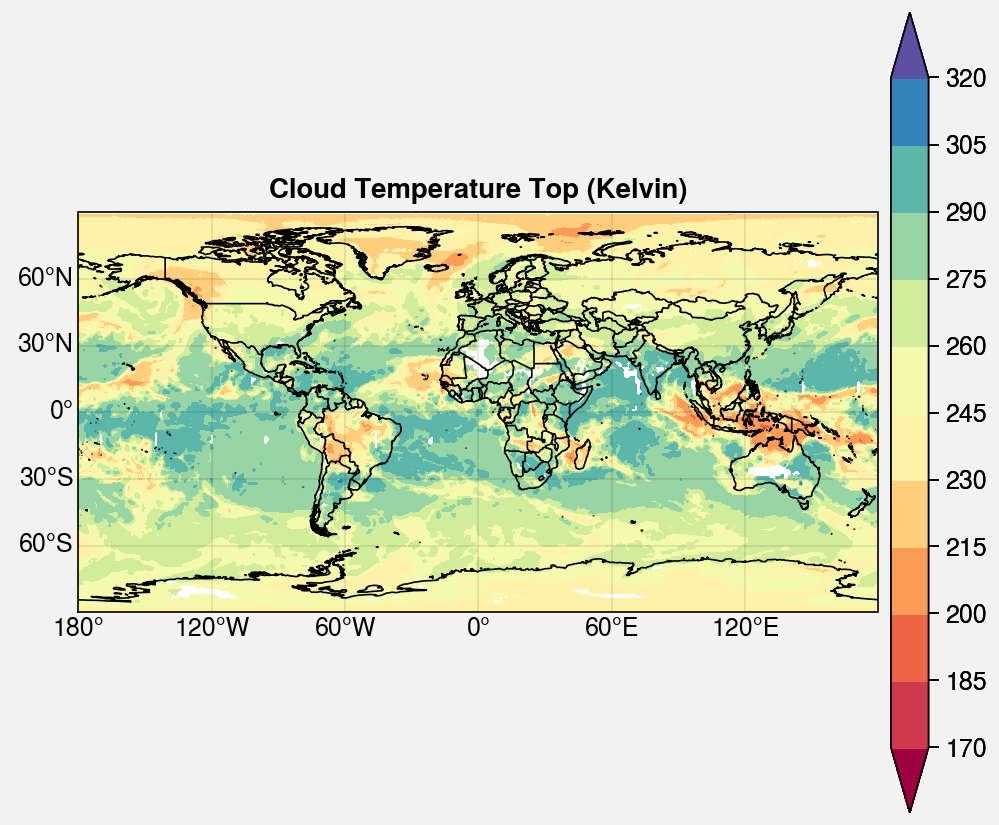

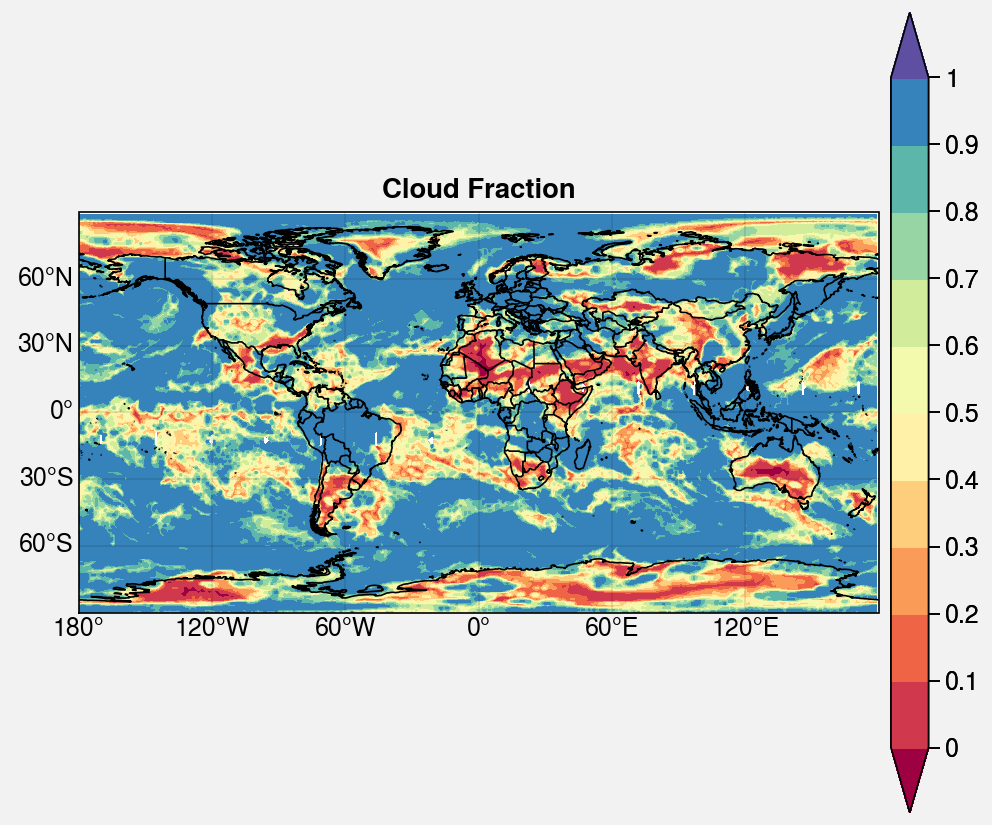

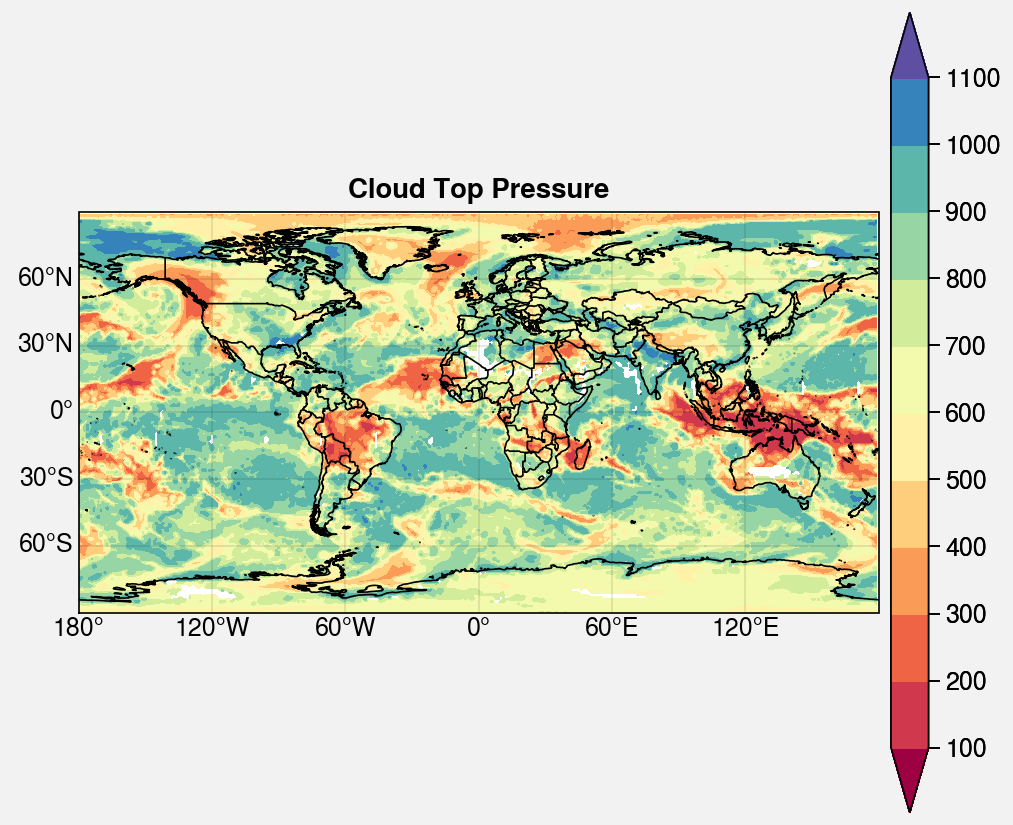

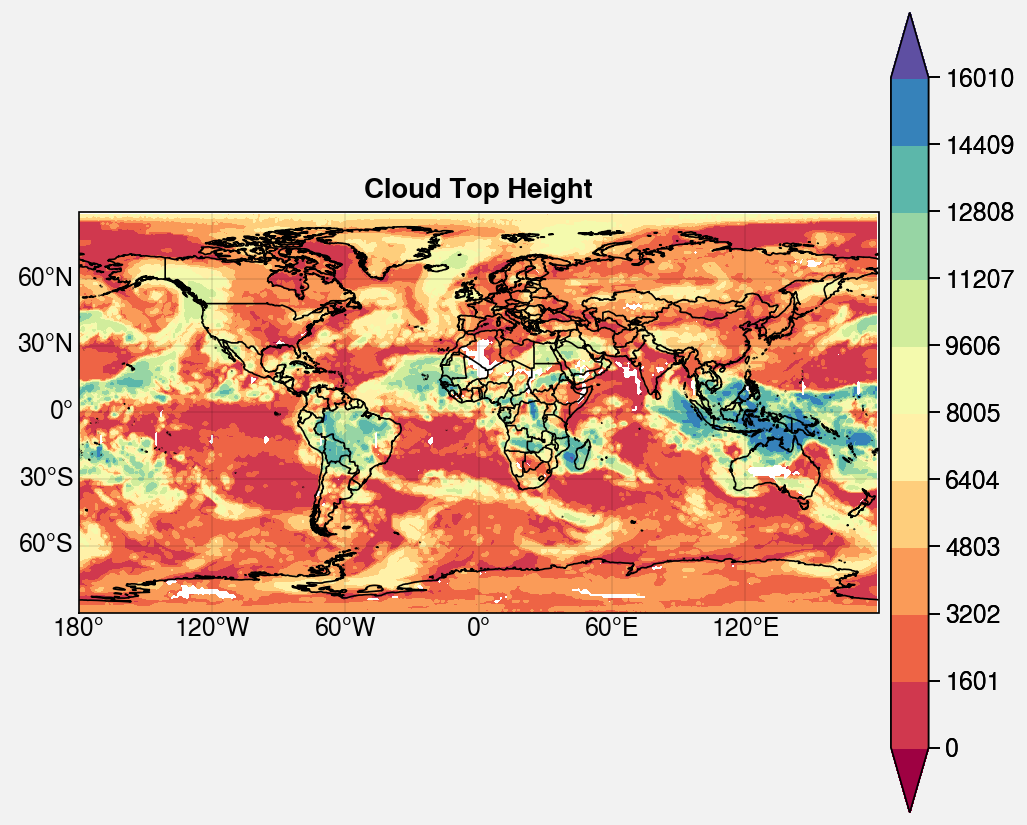

In [4]:
import os 
import sys
import glob
import numpy as np
import pandas as pd
from netCDF4 import Dataset

import seaborn as sns
import proplot as plot
import matplotlib.pyplot as plt



def plot_fig(values, ticks, title, filename ):
	NTA_lats = [-90,90]     
	NTA_lons = [-180,180] 

	gap_x, gap_y = 1, 1

	levels  = 11
	map_lon = np.arange(-180,180,gap_x)
	map_lat = np.arange(-90,90,gap_y)
	Lon,Lat = np.meshgrid(map_lon,map_lat)

	fig, axs = plot.subplots(nrows=1,ncols=1,aspect=2,axwidth=4,basemap=False, proj='cyl') #proj_kw={'lon_0': 180})

	m = axs[0,0].contourf(
	        map_lon, map_lat, values, levels=ticks, extend='both',
	        cmap='Spectral', norm='segmented',
	        colorbar='r', colorbar_kw={'ticks': ticks})

	# axs[0,0].format(title='Cloud Top Temperature (Kelvin)')

	 
	axs.format(
	    suptitle=title,
	    landcolor='mushroom', facecolor='white', land=False, 
	    reso='med', borders=True, titleborder=True,
	    lonlabels='b', latlabels='l',coast=True,latlines=30, lonlines=60)

	fig.savefig(filename,facecolor='white',dpi=300)


filename1 = "/home/supriya/IS_Thesis/stratus_endpoint/stratus/stratus/handlers/endpoint/samples/MODIS_aggregation/data/zmq_test/result/MYD08_M3.A200801_serial_output_daily_1km_v3_client.h5" #"test_result/MYD08_L3.A2008001.serial_output_daily_5km_v3.h5"
compared_name = 'Mean'

hdf = Dataset(filename1,'r')
cld_pixel1 = np.array(hdf.variables["cloud_fraction_{}".format(compared_name)][:])
scale_factor           = hdf.variables["cloud_fraction_{}".format(compared_name)].scale_factor
fillvalue              = hdf.variables["cloud_fraction_{}".format(compared_name)]._FillValue
offset                 = hdf.variables["cloud_fraction_{}".format(compared_name)].add_offset
cld_pixel1[np.where(cld_pixel1 == fillvalue)] = np.nan
cld_pixel1 = (cld_pixel1 - offset) / scale_factor 
cld_pixel1 = (cld_pixel1 - offset) * scale_factor 

cld_fraction1 = np.array(hdf.variables["cloud_fraction_{}".format("Mean")][:])
scale_factor           = hdf.variables["cloud_fraction_{}".format("Mean")].scale_factor
fillvalue              = hdf.variables["cloud_fraction_{}".format("Mean")]._FillValue
offset                 = hdf.variables["cloud_fraction_{}".format("Mean")].add_offset
cld_fraction1[np.where(cld_fraction1 == fillvalue)] = np.nan
#print(cld_fraction1)
cld_fraction1 = (cld_fraction1 - offset) / scale_factor 
cld_fraction1 = (cld_fraction1 - offset) * scale_factor 

#cloud_top_temperature
temp1 = np.array(hdf.variables["cloud_top_temperature_{}".format(compared_name)][:])
scale_factor   = hdf.variables["cloud_top_temperature_{}".format(compared_name)].scale_factor
fillvalue      = hdf.variables["cloud_top_temperature_{}".format(compared_name)]._FillValue
offset         = hdf.variables["cloud_top_temperature_{}".format(compared_name)].add_offset
temp1[np.where(temp1 == fillvalue)] = np.nan
# print(temp1[~np.isnan(temp1)])
temp1 = (temp1 - offset) / scale_factor 
# print(temp1[~np.isnan(temp1)])
temp1 = (temp1 - offset) * scale_factor 
# print(temp1[~np.isnan(temp1)])



#temp1 = temp1 + offset

#cloud_top_height
emis1 = np.array(hdf.variables["cloud_top_height_{}".format(compared_name)][:])
scale_factor   = hdf.variables["cloud_top_height_{}".format(compared_name)].scale_factor
fillvalue      = hdf.variables["cloud_top_height_{}".format(compared_name)]._FillValue
offset         = hdf.variables["cloud_top_height_{}".format(compared_name)].add_offset
emis1[np.where(emis1 == fillvalue)] = np.nan
emis1 = (emis1 - offset) / scale_factor 
emis1 = (emis1 - offset) * scale_factor 
# print(scale_factor)

#cloud_top_pressure
pres1 = np.array(hdf.variables["cloud_top_pressure_{}".format(compared_name)][:])
scale_factor   = hdf.variables["cloud_top_pressure_{}".format(compared_name)].scale_factor
fillvalue      = hdf.variables["cloud_top_pressure_{}".format(compared_name)]._FillValue
offset         = hdf.variables["cloud_top_pressure_{}".format(compared_name)].add_offset
pres1[np.where(pres1 == fillvalue)] = np.nan
pres1 = (pres1 - offset) / scale_factor 
pres1 = (pres1 - offset) * scale_factor 




print("Cloud Top Temp min: " + str(temp1[~np.isnan(temp1)].min()))
print("Cloud Top Temp max: " + str(temp1[~np.isnan(temp1)].max())) 

print("Cloud Top Pressure min: " + str(pres1[~np.isnan(pres1)].min()))
print("Cloud Top Pressure max: " + str(pres1[~np.isnan(pres1)].max())) 

print("Cloud frac min: " + str(cld_fraction1[~np.isnan(cld_fraction1)].min()))
print("Cloud frac max: " + str(cld_fraction1[~np.isnan(cld_fraction1)].max())) 

print("Cloud Top Height min: " + str(emis1[~np.isnan(emis1)].min()))
print("Cloud Top Height max: " + str(emis1[~np.isnan(emis1)].max())) 




ticks_temp = np.linspace(170,320,11)
ticks_frac = np.linspace(0,1,11)
ticks_pres = np.linspace(100,1100,11)
ticks_emis = np.linspace(0,16010,11)


plot_fig(temp1, ticks_temp, "Cloud Temperature Top (Kelvin)", "cloud_top_temp.png")
plot_fig(cld_fraction1, ticks_frac, "Cloud Fraction", "cloud_fraction.png")
plot_fig(pres1, ticks_pres, "Cloud Top Pressure", "cloud_top_pressure.png")
plot_fig(emis1, ticks_emis, "Cloud Top Height", "cloud_top_height.png")
